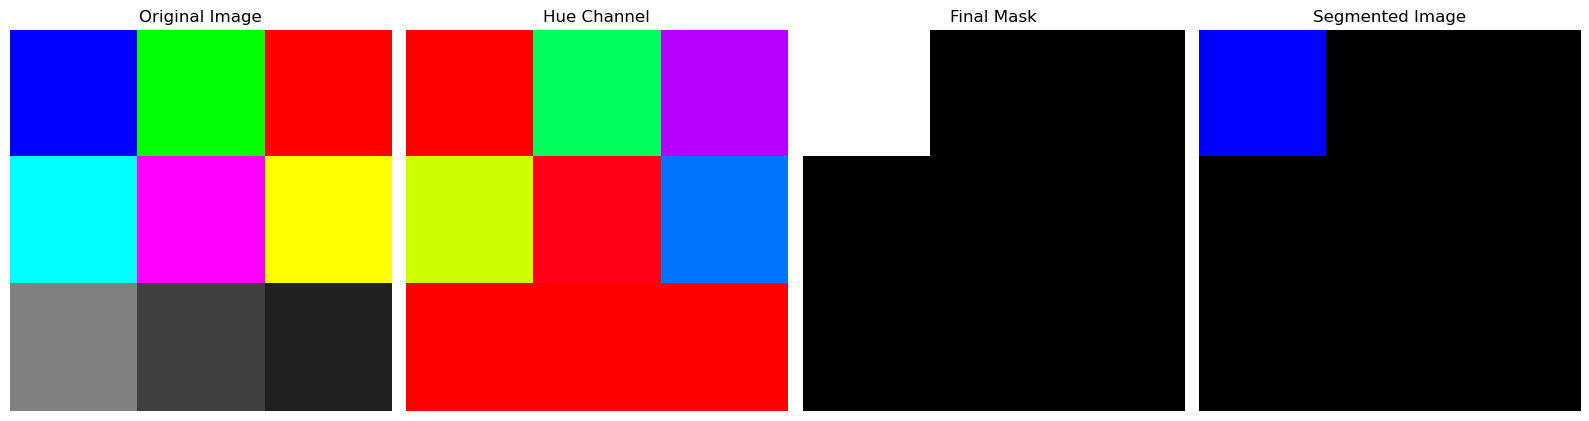

In [9]:
# This script demonstrates a practical method for color segmentation using the HSI color space.
# The process involves the following steps:
# 1. Load the input image and convert it from RGB to HSI (using OpenCV's HSV representation).
# 2. Extract the Hue, Saturation, and Intensity channels from the HSI image.
# 3. Threshold the Saturation channel to create a mask for regions with high saturation.
#    - This helps isolate areas with prominent color intensity.
# 4. Apply a mask to the Hue channel to focus on a specific range of hues (e.g., reddish hues).
# 5. Combine the Saturation and Hue masks to create a final binary mask.
# 6. Apply the final mask to the original image to segment the desired regions.
# 7. Visualize the results:
#    - Original image.
#    - Hue channel to show color information.
#    - Binary mask created by combining Hue and Saturation thresholds.
#    - Segmented image showing only the reddish regions.
# This script is ideal for quickly demonstrating a compact and efficient color segmentation workflow.

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example RGB image (4x4)
# image = np.array([
#     [[255, 100, 100], [120, 50, 50], [50, 150, 50], [20, 20, 200]],  # Row 1
#     [[200, 60, 60], [60, 200, 60], [60, 60, 200], [150, 20, 20]],    # Row 2
#     [[100, 255, 100], [50, 50, 150], [150, 150, 50], [255, 0, 0]],   # Row 3
#     [[255, 200, 200], [200, 255, 200], [200, 200, 255], [100, 100, 100]]  # Row 4
# ], dtype=np.uint8)


# image = np.array([
#     [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
#     [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
#     [[128, 64, 32], [64, 128, 255], [0, 0, 0]]
# ], dtype=np.uint8)


image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[128, 128, 128], [64, 64, 64], [32, 32, 32]]
], dtype=np.uint8)




# image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
# image = cv2.imread(image_path)



# Convert RGB to HSV (OpenCV uses HSV instead of HSI)
image_hsi = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Extract H, S, and I channels
hue = image_hsi[:, :, 0]  # Hue
saturation = image_hsi[:, :, 1]  # Saturation
intensity = image_hsi[:, :, 2]  # Intensity

# Step 1: Threshold Saturation
threshold_saturation = 0.1 * np.max(saturation)
saturation_mask = saturation > threshold_saturation

# Step 2: Mask Hue for reddish values (Hue range for reddish: 0-20)
hue_mask = (hue >= 0) & (hue <= 20)

# Step 3: Combine masks
final_mask = saturation_mask & hue_mask

# Step 4: Apply mask to original image
segmented_image = cv2.bitwise_and(image, image, mask=final_mask.astype(np.uint8))

# Visualization
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(hue, cmap="hsv")
axes[1].set_title("Hue Channel")
axes[1].axis("off")

axes[2].imshow(final_mask, cmap="gray")
axes[2].set_title("Final Mask")
axes[2].axis("off")

axes[3].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
axes[3].set_title("Segmented Image")
axes[3].axis("off")

plt.tight_layout()
plt.show()
